# Wrangle Business Data

In [1]:
import numpy as np
import pandas as pd
import datetime
import json

In [2]:
day_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [3]:
TITLE_FONT_SIZE = 25
LABEL_FONT_SIZE = 15
TICK_FONT_SIZE  = 15

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

def time_marker(text=''):
    print('[{}] {}'.format(datetime.datetime.now().time(), text.lower()))

## Load the Data

In [4]:
data = pd.DataFrame()
source_data_file = '../source_data/business.json'

biz_list = []
for line in open(source_data_file, 'r'):
    biz_list.append(json.loads(line))

time_marker(text='creating dataframe...')
data = pd.DataFrame(biz_list)

time_marker(text='set index to business_id...')
data.set_index('business_id', inplace=True, drop=True)

[12:19:50.829167] creating dataframe...
[12:19:52.012301] set index to business_id...


In [5]:
data.head()

,address,attributes,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
business_id,,,,,,,,,,,,,,
FYWN1wneV18bWNgQjJ2GNg,"4855 E Warner Rd, Ste B9","{'AcceptsInsurance': True, 'ByAppointmentOnly'...","[Dentists, General Dentistry, Health & Medical...",Ahwatukee,"{'Friday': '7:30-17:00', 'Tuesday': '7:30-17:0...",1,33.330690,-111.978599,Dental by Design,,85044,22,4.0,AZ
He-G7vWjzVUysIKrfNbPUQ,3101 Washington Rd,"{'BusinessParking': {'garage': False, 'street'...","[Hair Stylists, Hair Salons, Men's Hair Salons...",McMurray,"{'Monday': '9:00-20:00', 'Tuesday': '9:00-20:0...",1,40.291685,-80.104900,Stephen Szabo Salon,,15317,11,3.0,PA
KQPW8lFf1y5BT2MxiSZ3QA,"6025 N 27th Ave, Ste 1",{},"[Departments of Motor Vehicles, Public Service...",Phoenix,{},1,33.524903,-112.115310,Western Motor Vehicle,,85017,18,1.5,AZ
8DShNS-LuFqpEWIp0HxijA,"5000 Arizona Mills Cr, Ste 435","{'BusinessAcceptsCreditCards': True, 'Restaura...","[Sporting Goods, Shopping]",Tempe,"{'Monday': '10:00-21:00', 'Tuesday': '10:00-21...",0,33.383147,-111.964725,Sports Authority,,85282,9,3.0,AZ
PfOCPjBrlQAnz__NXj9h_w,581 Howe Ave,"{'Alcohol': 'full_bar', 'HasTV': True, 'NoiseL...","[American (New), Nightlife, Bars, Sandwiches, ...",Cuyahoga Falls,"{'Monday': '11:00-1:00', 'Tuesday': '11:00-1:0...",1,41.119535,-81.475690,Brick House Tavern + Tap,,44221,116,3.5,OH


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 174567 entries, FYWN1wneV18bWNgQjJ2GNg to viKaP26BcHU6cLx8sf4gKg
Data columns (total 14 columns):
address         174567 non-null object
attributes      174567 non-null object
categories      174567 non-null object
city            174567 non-null object
hours           174567 non-null object
is_open         174567 non-null int64
latitude        174566 non-null float64
longitude       174566 non-null float64
name            174567 non-null object
neighborhood    174567 non-null object
postal_code     174567 non-null object
review_count    174567 non-null int64
stars           174567 non-null float64
state           174567 non-null object
dtypes: float64(3), int64(2), object(9)
memory usage: 20.0+ MB


## Drop non US Locations

In [7]:
us_states = ['AZ', 'PA', 'OH', 'NV', 'NC', 'WI', 'SC', 'IL']

data = data[data.state.isin(us_states)].copy()

## Drop 'Closed' Locations

In [8]:
data = data[data.is_open == 1].copy()

## Parse `categories` column and keep only restaurants

In [9]:
data = data[data.categories.apply(lambda x: 'Restaurants' in x)].copy()

## Drop `attributes` column

In [10]:
data = data.drop(['attributes', 'latitude', 'longitude'], axis=1)

## Unpack Business Hours

In [11]:
time_marker(text='collecting business Hours...')
hours = data[['hours']].copy()

time_marker('splitting hours into individual columns...')
hours = pd.concat([hours.drop(['hours'], axis=1), hours['hours'].apply(pd.Series)], axis=1)

time_marker(text='Split hours into open and close...')
# split daily hours columns into '{DAY}_open' and '{DAY}_close'
for col in hours.columns:

    # split hours column of [11:00-19:00] into '{original_name}_open' and '{original_name}_close' columns
    hours['{}_open'.format(col.lower())]  = pd.to_datetime(hours[col].str.split('-', 1).str[0], format='%H:%M').dt.time
    hours['{}_close'.format(col.lower())] = pd.to_datetime(hours[col].str.split('-', 1).str[1], format='%H:%M').dt.time

    # drop original day columns
    hours.drop(col, axis=1, inplace=True)

time_marker('sorting day columns order...')
cols = [['{}_open'.format(x.lower()), '{}_close'.format(x.lower())] for x in day_labels]
ordered_cols = list()
for day in cols:
    for time in day:
        ordered_cols.append(time)

hours = hours[ordered_cols].copy()

# fill nan
hours = hours.replace(np.nan, '00:00:00', regex=True)

# merge back to original data frame
time_marker(text='merge open and close hours to business data...')
data = data.merge(hours, left_index=True, right_index=True)

data.drop(['hours'], axis=1, inplace=True)

[12:20:11.279782] collecting business hours...
[12:20:11.284891] splitting hours into individual columns...
[12:20:23.243994] split hours into open and close...
[12:20:27.445376] sorting day columns order...
[12:20:27.518478] merge open and close hours to business data...


## Lowercase and Sanitize Categories Lists

In [12]:
data['categories'] = data.categories.apply(lambda x: [c.lower().replace(' ','_') for c in x])

## Cleanup columns and reset index

In [13]:
time_marker(text='cleaning up and reset index...')
data.columns = [str(x).lower().replace(' ', '_') for x in data.columns]
data.reset_index(inplace=True)

[12:20:29.524269] cleaning up and reset index...


In [14]:
data.head()

,business_id,address,categories,city,is_open,name,neighborhood,postal_code,review_count,stars,...,wednesday_open,wednesday_close,thursday_open,thursday_close,friday_open,friday_close,saturday_open,saturday_close,sunday_open,sunday_close
0,PfOCPjBrlQAnz__NXj9h_w,581 Howe Ave,"[american_(new), nightlife, bars, sandwiches, ...",Cuyahoga Falls,1,Brick House Tavern + Tap,,44221,116,3.5,...,11:00:00,01:00:00,11:00:00,01:00:00,11:00:00,01:00:00,11:00:00,02:00:00,11:00:00,00:00:00
1,fNMVV_ZX7CJSDWQGdOM8Nw,600 E 4th St,"[restaurants, american_(traditional)]",Charlotte,1,Showmars Government Center,Uptown,28202,7,3.5,...,07:00:00,15:00:00,07:00:00,15:00:00,07:00:00,15:00:00,00:00:00,00:00:00,00:00:00,00:00:00
2,Dj0S-Oe4ytRJzMGUPgYUkw,38295 Chestnut Ridge Rd,"[soup, salad, sandwiches, restaurants]",Elyria,1,Panera Bread,,44035,4,2.0,...,06:30:00,21:00:00,06:30:00,21:00:00,06:30:00,22:00:00,07:00:00,22:00:00,07:00:00,20:00:00
3,tRVx2c89coruPRwYhGTcTw,13603 Madison Ave,"[nightlife, izakaya, comfort_food, cocktail_ba...",Lakewood,1,Yuzu,,44107,78,3.5,...,12:00:00,02:00:00,12:00:00,02:00:00,12:00:00,02:00:00,11:00:00,02:00:00,00:00:00,00:00:00
4,rDMptJYWtnMhpQu_rRXHng,719 E Thunderbird Rd,"[fast_food, burgers, restaurants]",Phoenix,1,McDonald's,,85022,10,1.0,...,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23366 entries, 0 to 23365
Data columns (total 25 columns):
business_id        23366 non-null object
address            23366 non-null object
categories         23366 non-null object
city               23366 non-null object
is_open            23366 non-null int64
name               23366 non-null object
neighborhood       23366 non-null object
postal_code        23366 non-null object
review_count       23366 non-null int64
stars              23366 non-null float64
state              23366 non-null object
monday_open        23366 non-null object
monday_close       23366 non-null object
tuesday_open       23366 non-null object
tuesday_close      23366 non-null object
wednesday_open     23366 non-null object
wednesday_close    23366 non-null object
thursday_open      23366 non-null object
thursday_close     23366 non-null object
friday_open        23366 non-null object
friday_close       23366 non-null object
saturday_open      23366 non-nu

In [16]:
data.head().transpose()

,0,1,2,3,4
business_id,PfOCPjBrlQAnz__NXj9h_w,fNMVV_ZX7CJSDWQGdOM8Nw,Dj0S-Oe4ytRJzMGUPgYUkw,tRVx2c89coruPRwYhGTcTw,rDMptJYWtnMhpQu_rRXHng
address,581 Howe Ave,600 E 4th St,38295 Chestnut Ridge Rd,13603 Madison Ave,719 E Thunderbird Rd
categories,"[american_(new), nightlife, bars, sandwiches, ...","[restaurants, american_(traditional)]","[soup, salad, sandwiches, restaurants]","[nightlife, izakaya, comfort_food, cocktail_ba...","[fast_food, burgers, restaurants]"
city,Cuyahoga Falls,Charlotte,Elyria,Lakewood,Phoenix
is_open,1,1,1,1,1
name,Brick House Tavern + Tap,Showmars Government Center,Panera Bread,Yuzu,McDonald's
neighborhood,,Uptown,,,
postal_code,44221,28202,44035,44107,85022
review_count,116,7,4,78,10
stars,3.5,3.5,2,3.5,1


## Unique categories

In [17]:
import itertools

In [18]:
all_categories = list(itertools.chain.from_iterable(data.categories.values))

categories = {}

for item in all_categories:
    if item not in categories.keys():
        categories[item] = 1
    else:
        categories[item] += 1
del categories['restaurants']
del categories['food']

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
df = pd.DataFrame.from_dict(categories, orient='index')
df.columns = ['counts']
df.sort_values('counts', inplace=True, ascending=False)

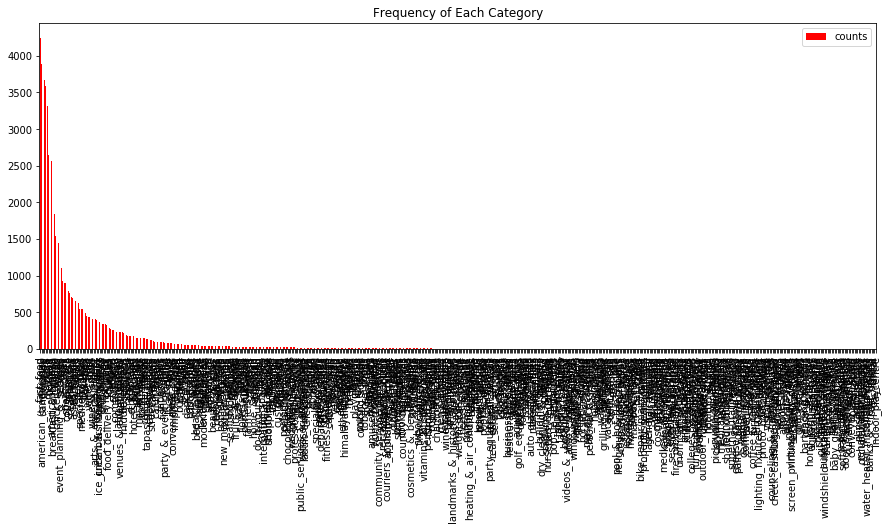

In [21]:
df.plot(kind='bar', figsize=(15,6), color='r')
plt.title('Frequency of Each Category')
plt.show()
plt.close()

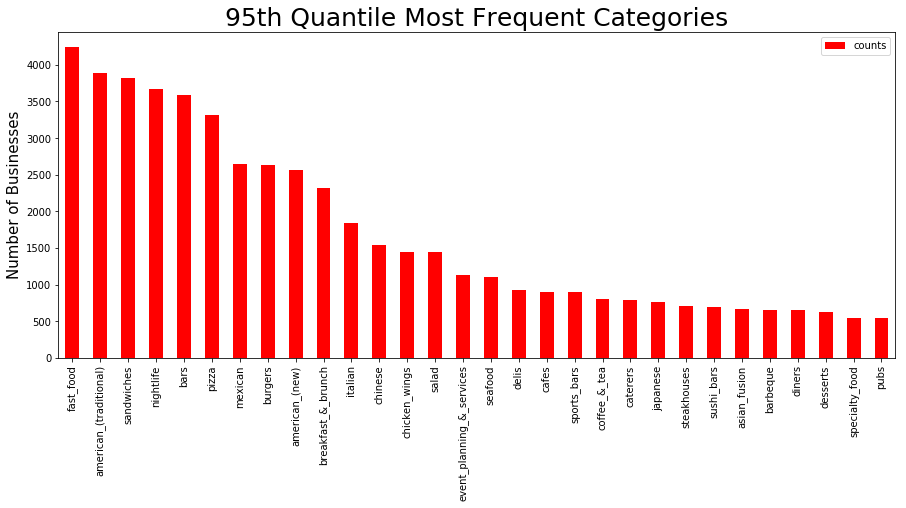

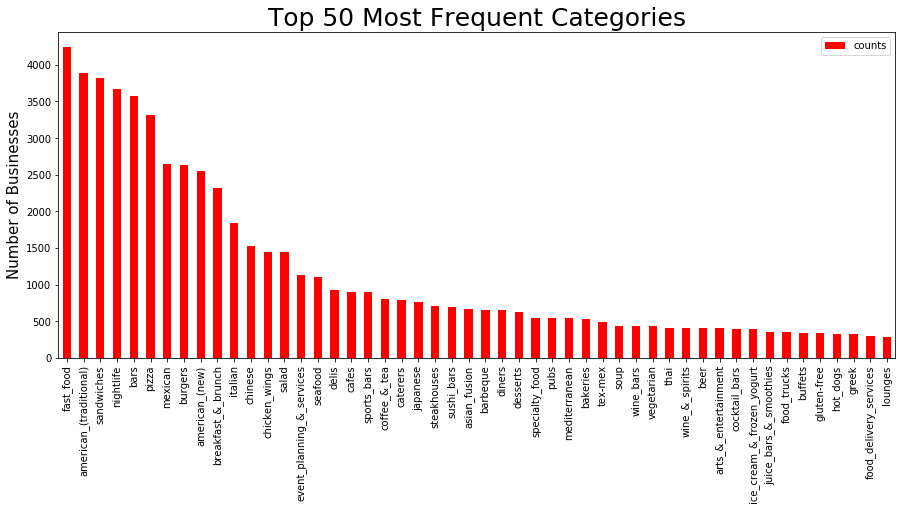

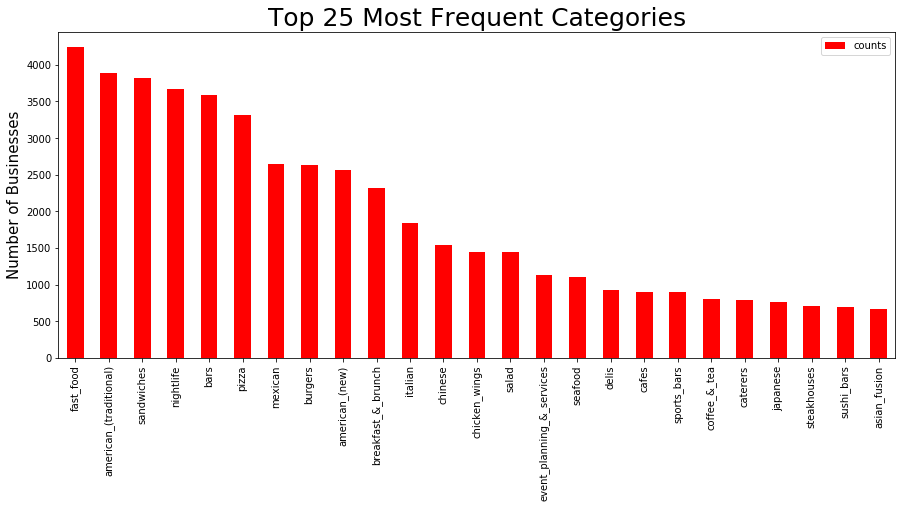

In [22]:
df[df.counts > df.counts.quantile(0.95)].plot(kind='bar', figsize=(15,6), color='r')
plt.title('95th Quantile Most Frequent Categories', size=TITLE_FONT_SIZE)
plt.ylabel('Number of Businesses', size=LABEL_FONT_SIZE)
plt.show()
plt.close()

df[:50].plot(kind='bar', figsize=(15,6), color='r')
plt.title('Top 50 Most Frequent Categories', size=TITLE_FONT_SIZE)
plt.ylabel('Number of Businesses', size=LABEL_FONT_SIZE)
plt.savefig('../charts/top_50_restaurant_categories_pass0.png')
plt.show()
plt.close()

df[:25].plot(kind='bar', figsize=(15,6), color='r')
plt.title('Top 25 Most Frequent Categories', size=TITLE_FONT_SIZE)
plt.ylabel('Number of Businesses', size=LABEL_FONT_SIZE)
plt.show()
plt.close()

## Cleanup Categories we might not want
<p>Refilter restaurants to only be restaurants with both 'Restaurants' and at least one of the top 50 categories</p>
<p>There are some categories we dont want in the top 50, remove businesses with any of these categories</p>

In [23]:
top_50_categories = [x for x in df[:50].index.values]
print(top_50_categories)

['fast_food', 'american_(traditional)', 'sandwiches', 'nightlife', 'bars', 'pizza', 'mexican', 'burgers', 'american_(new)', 'breakfast_&_brunch', 'italian', 'chinese', 'chicken_wings', 'salad', 'event_planning_&_services', 'seafood', 'delis', 'cafes', 'sports_bars', 'coffee_&_tea', 'caterers', 'japanese', 'steakhouses', 'sushi_bars', 'asian_fusion', 'barbeque', 'diners', 'desserts', 'specialty_food', 'pubs', 'mediterranean', 'bakeries', 'tex-mex', 'soup', 'wine_bars', 'vegetarian', 'thai', 'wine_&_spirits', 'beer', 'arts_&_entertainment', 'cocktail_bars', 'ice_cream_&_frozen_yogurt', 'juice_bars_&_smoothies', 'food_trucks', 'buffets', 'gluten-free', 'hot_dogs', 'greek', 'food_delivery_services', 'lounges']


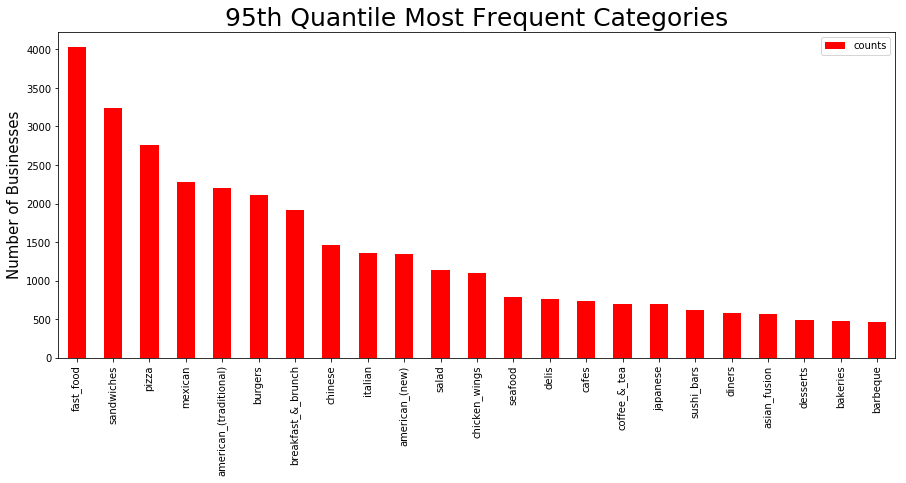

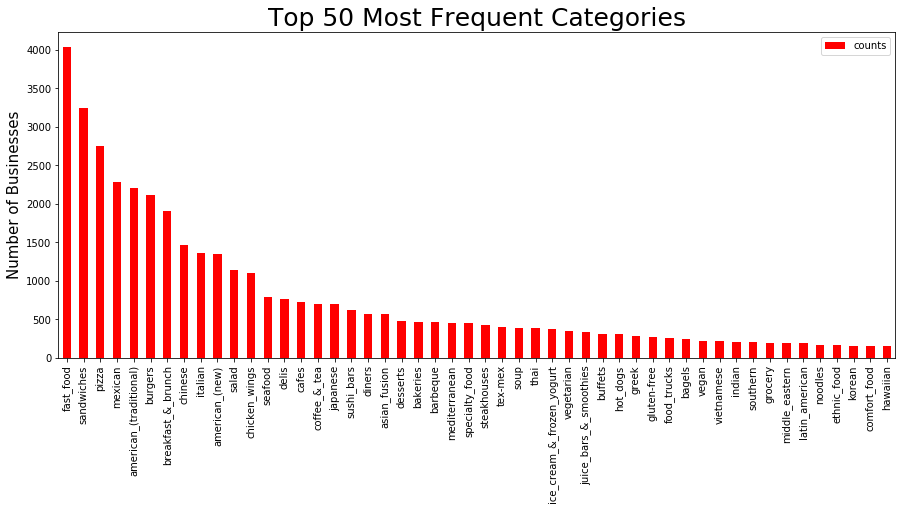

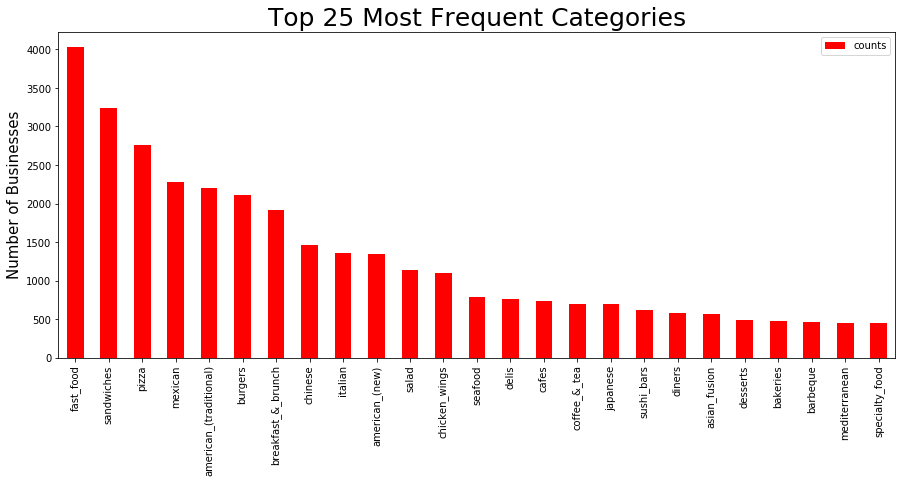

In [24]:
categories_to_ignore = ['nightlife', 'event_planning_&_services', 'caterers', 'arts_&_entertainment', 'food_delivery_services']

data_pass2 = data.copy()
for cat in categories_to_ignore:
    data_pass2 = data_pass2[data_pass2.categories.apply(lambda x: cat not in x)].copy()

all_categories = list(itertools.chain.from_iterable(data_pass2.categories.values))

categories = {}

for item in all_categories:
    if item not in categories.keys():
        categories[item] = 1
    else:
        categories[item] += 1
del categories['restaurants']
del categories['food']

df = pd.DataFrame.from_dict(categories, orient='index')
df.columns = ['counts']
df.sort_values('counts', inplace=True, ascending=False)

df[df.counts > df.counts.quantile(0.95)].plot(kind='bar', figsize=(15,6), color='r')
plt.title('95th Quantile Most Frequent Categories', size=TITLE_FONT_SIZE)
plt.ylabel('Number of Businesses', size=LABEL_FONT_SIZE)
plt.show()
plt.close()

df[:50].plot(kind='bar', figsize=(15,6), color='r')
plt.title('Top 50 Most Frequent Categories', size=TITLE_FONT_SIZE)
plt.ylabel('Number of Businesses', size=LABEL_FONT_SIZE)
plt.savefig('../charts/top_50_restaurant_categories_pass2.png')
plt.show()
plt.close()

df[:25].plot(kind='bar', figsize=(15,6), color='r')
plt.title('Top 25 Most Frequent Categories', size=TITLE_FONT_SIZE)
plt.ylabel('Number of Businesses', size=LABEL_FONT_SIZE)
plt.show()
plt.close()

## A Third Pass
<p>We are very close, but lets toss out businesses with 'grocery' as a category</p>

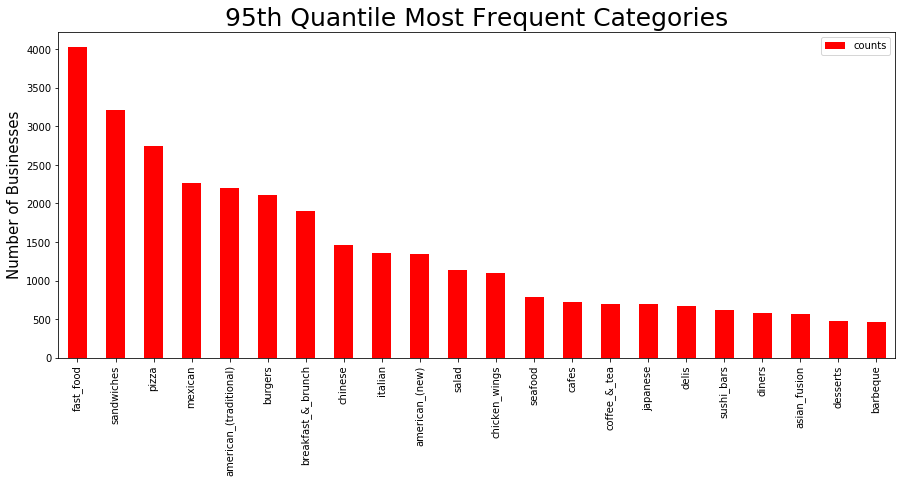

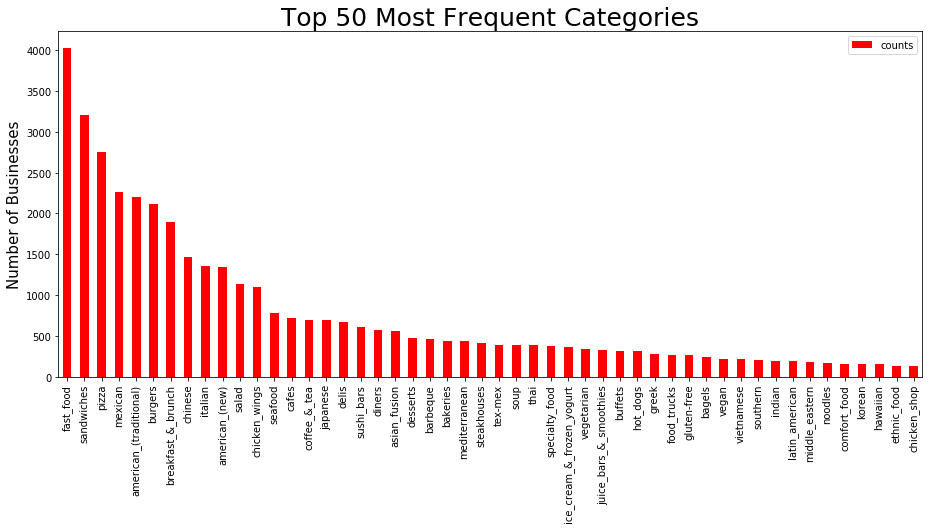

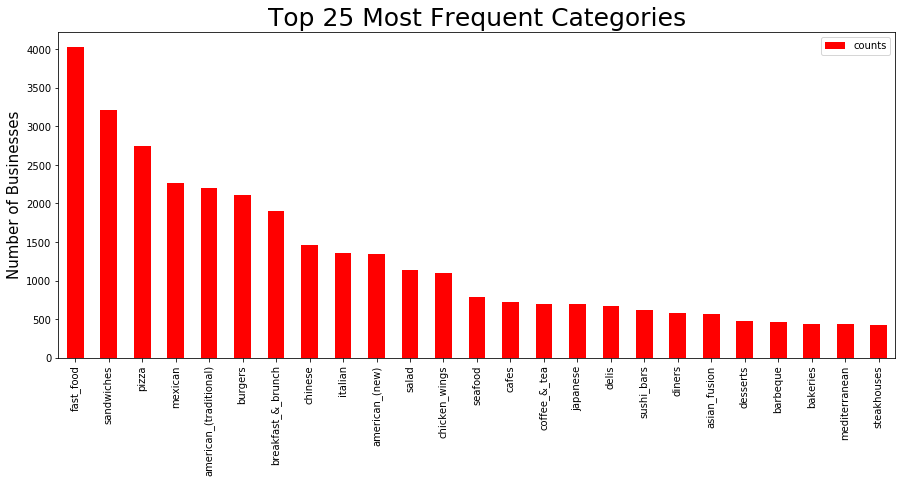

In [25]:
categories_to_ignore = ['grocery']

data_pass3 = data_pass2.copy()
for cat in categories_to_ignore:
    data_pass3 = data_pass3[data_pass3.categories.apply(lambda x: cat not in x)].copy()

all_categories = list(itertools.chain.from_iterable(data_pass3.categories.values))

categories = {}

for item in all_categories:
    if item not in categories.keys():
        categories[item] = 1
    else:
        categories[item] += 1
del categories['restaurants']
del categories['food']

df = pd.DataFrame.from_dict(categories, orient='index')
df.columns = ['counts']
df.sort_values('counts', inplace=True, ascending=False)

df[df.counts > df.counts.quantile(0.95)].plot(kind='bar', figsize=(15,6), color='r')
plt.title('95th Quantile Most Frequent Categories', size=TITLE_FONT_SIZE)
plt.ylabel('Number of Businesses', size=LABEL_FONT_SIZE)
plt.show()
plt.close()

ax = df[:50].plot(kind='bar', figsize=(15,6), color='r')
ax.set_title('Top 50 Most Frequent Categories', size=TITLE_FONT_SIZE)
ax.set_ylabel('Number of Businesses', size=LABEL_FONT_SIZE)
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
plt.savefig('../charts/top_50_restaurant_categories_pass3.png')
plt.show()
plt.close()

df[:25].plot(kind='bar', figsize=(15,6), color='r')
plt.title('Top 25 Most Frequent Categories', size=TITLE_FONT_SIZE)
plt.ylabel('Number of Businesses', size=LABEL_FONT_SIZE)
plt.show()
plt.close()

## One Last Pass to clean up Categories of special characters

In [26]:
data_pass3['categories'] = data_pass3.categories.apply(lambda x: [c.replace('(','').replace(')','').replace('&','').replace('-','_').replace('/','_').replace('\'','').replace('__','_') for c in x])

In [27]:
data_pass3.reset_index(inplace=True, drop=True)

In [28]:
data_pass3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18232 entries, 0 to 18231
Data columns (total 25 columns):
business_id        18232 non-null object
address            18232 non-null object
categories         18232 non-null object
city               18232 non-null object
is_open            18232 non-null int64
name               18232 non-null object
neighborhood       18232 non-null object
postal_code        18232 non-null object
review_count       18232 non-null int64
stars              18232 non-null float64
state              18232 non-null object
monday_open        18232 non-null object
monday_close       18232 non-null object
tuesday_open       18232 non-null object
tuesday_close      18232 non-null object
wednesday_open     18232 non-null object
wednesday_close    18232 non-null object
thursday_open      18232 non-null object
thursday_close     18232 non-null object
friday_open        18232 non-null object
friday_close       18232 non-null object
saturday_open      18232 non-nu

In [29]:
data_pass3.head().transpose()

,0,1,2,3,4
business_id,fNMVV_ZX7CJSDWQGdOM8Nw,Dj0S-Oe4ytRJzMGUPgYUkw,rDMptJYWtnMhpQu_rRXHng,1WBkAuQg81kokZIPMpn9Zg,4srfPk1s8nlm1YusyDUbjg
address,600 E 4th St,38295 Chestnut Ridge Rd,719 E Thunderbird Rd,"777 E Thunderbird Rd, Ste 107","6889 S Eastern Ave, Ste 101"
categories,"[restaurants, american_traditional]","[soup, salad, sandwiches, restaurants]","[fast_food, burgers, restaurants]","[burgers, restaurants]","[fast_food, restaurants, sandwiches]"
city,Charlotte,Elyria,Phoenix,Phoenix,Las Vegas
is_open,1,1,1,1,1
name,Showmars Government Center,Panera Bread,McDonald's,Charr An American Burger Bar,Subway
neighborhood,Uptown,,,,Southeast
postal_code,28202,44035,85022,85022,89119
review_count,7,4,10,232,6
stars,3.5,2,1,3,2.5


In [30]:
data_pass3.groupby('state').count()

,business_id,address,categories,city,is_open,name,neighborhood,postal_code,review_count,stars,...,wednesday_open,wednesday_close,thursday_open,thursday_close,friday_open,friday_close,saturday_open,saturday_close,sunday_open,sunday_close
state,,,,,,,,,,,,,,,,,,,,,
AZ,5925,5925,5925,5925,5925,5925,5925,5925,5925,5925,...,5925,5925,5925,5925,5925,5925,5925,5925,5925,5925
IL,364,364,364,364,364,364,364,364,364,364,...,364,364,364,364,364,364,364,364,364,364
NC,2305,2305,2305,2305,2305,2305,2305,2305,2305,2305,...,2305,2305,2305,2305,2305,2305,2305,2305,2305,2305
NV,3877,3877,3877,3877,3877,3877,3877,3877,3877,3877,...,3877,3877,3877,3877,3877,3877,3877,3877,3877,3877
OH,2811,2811,2811,2811,2811,2811,2811,2811,2811,2811,...,2811,2811,2811,2811,2811,2811,2811,2811,2811,2811
PA,2065,2065,2065,2065,2065,2065,2065,2065,2065,2065,...,2065,2065,2065,2065,2065,2065,2065,2065,2065,2065
SC,114,114,114,114,114,114,114,114,114,114,...,114,114,114,114,114,114,114,114,114,114
WI,771,771,771,771,771,771,771,771,771,771,...,771,771,771,771,771,771,771,771,771,771


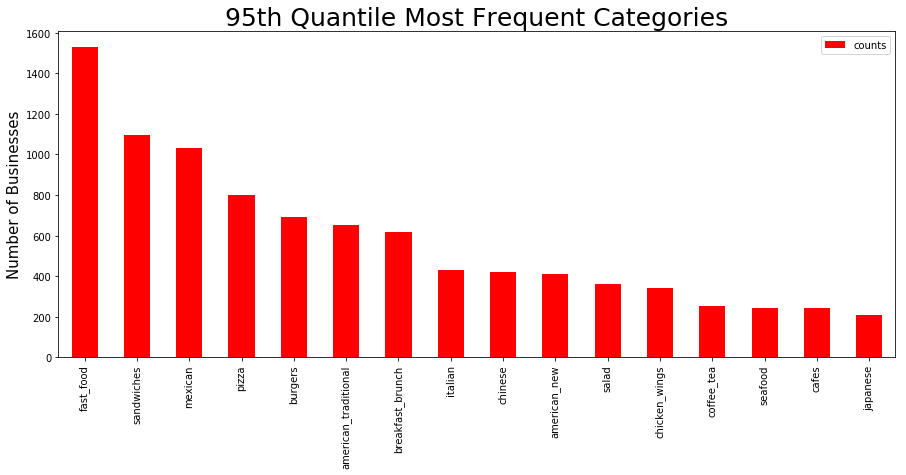

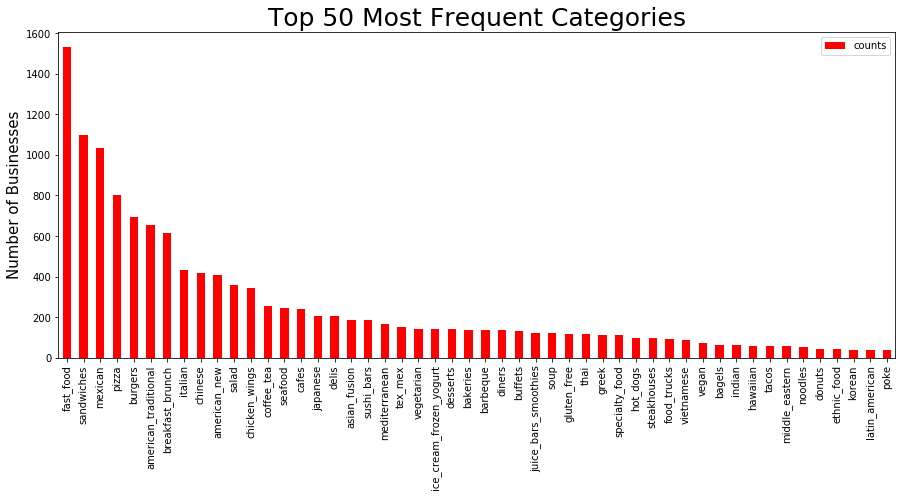

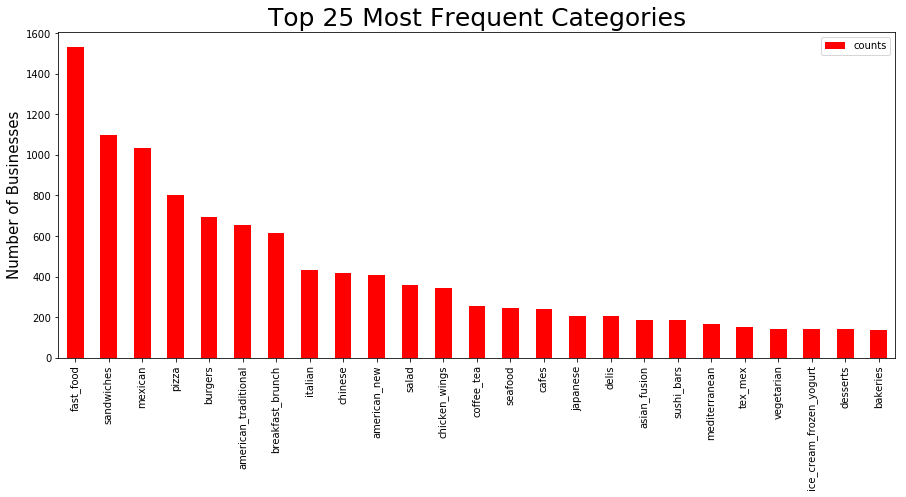

In [34]:
tmp = data_pass3[data_pass3.state == 'AZ'].copy()

all_categories = list(itertools.chain.from_iterable(tmp.categories.values))

categories = {}

for item in all_categories:
    if item not in categories.keys():
        categories[item] = 1
    else:
        categories[item] += 1
del categories['restaurants']
del categories['food']

df = pd.DataFrame.from_dict(categories, orient='index')
df.columns = ['counts']
df.sort_values('counts', inplace=True, ascending=False)

df[df.counts > df.counts.quantile(0.95)].plot(kind='bar', figsize=(15,6), color='r')
plt.title('95th Quantile Most Frequent Categories', size=TITLE_FONT_SIZE)
plt.ylabel('Number of Businesses', size=LABEL_FONT_SIZE)
plt.show()
plt.close()

df[:50].plot(kind='bar', figsize=(15,6), color='r')
plt.title('Top 50 Most Frequent Categories', size=TITLE_FONT_SIZE)
plt.ylabel('Number of Businesses', size=LABEL_FONT_SIZE)
# plt.savefig('../charts/top_50_restaurant_categories_pass2.png')
plt.show()
plt.close()

df[:25].plot(kind='bar', figsize=(15,6), color='r')
plt.title('Top 25 Most Frequent Categories', size=TITLE_FONT_SIZE)
plt.ylabel('Number of Businesses', size=LABEL_FONT_SIZE)
plt.show()
plt.close()

# Write to File

In [ ]:
file_name = '../clean_data/business_clean.csv'
time_marker(text='Writing {:d} records to file {}'.format(data_pass3.shape[0], file_name))
data_pass3.to_csv(file_name, encoding='utf-8')